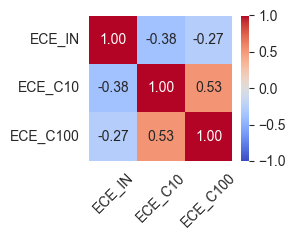

In [74]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('results_pre.csv')

# Filter the rows for the datasets of interest
datasets = ['ImageNet16-120', 'cifar10', 'cifar100']
labels = ['ECE_IN', 'ECE_C10', 'ECE_C100']

ece_values = {}

# Extract the ECE value for 15 bins for each dataset and store in a dictionary
for dataset in datasets:
    ece_values[dataset] = df[df['dataset'] == dataset]['ece'].apply(
        lambda x: [entry['result'] for entry in ast.literal_eval(x) if entry['n_bins'] == 15].pop()
    ).tolist()

# Convert the dictionary to a dataframe
ece_df = pd.DataFrame(ece_values)

# Compute the Kendall ranking matrix
kendall_matrix = ece_df.corr(method='kendall')

# Define colorbar ticks
cbar_ticks = [-1, -0.5, 0, 0.5, 1]

# Create the figure with a white background
plt.figure(figsize=(3, 2.5))
ax = sns.heatmap(kendall_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            xticklabels=labels, yticklabels=labels, cbar_kws={"ticks": cbar_ticks})

# plt.title('Kendall Ranking Matrix for ECE with 15 bins for three datasets')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig("figure1.png", dpi=300, bbox_inches='tight')
plt.show()


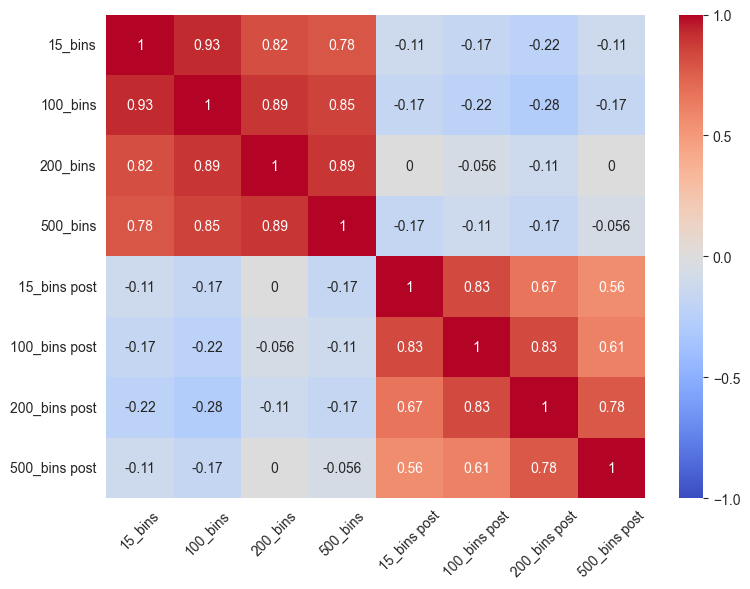

In [39]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt

# Define a function to extract the ECE values for the desired bins
def extract_ece_values(df, bins):
    ece_values = []
    for bin_size in bins:
        ece_values.append(df['ece'].apply(
            lambda x: [entry['result'] for entry in ast.literal_eval(x) if entry['n_bins'] == bin_size].pop()
        ))
    return ece_values

# Load the data
df_pre = pd.read_csv('results_pre.csv')
df_post = pd.read_csv('results_post.csv')

# Filter the rows for CIFAR-10
df_pre = df_pre[df_pre['dataset'] == 'cifar10']
df_post = df_post[df_post['dataset'] == 'cifar10']

cbar_ticks = [-1, -0.5, 0, 0.5, 1]
labels = ['15_bins', '100_bins', '200_bins', "500_bins", "15_bins post", "100_bins post", "200_bins post", "500_bins post"]
bins = [15, 100, 200, 500]

# Extract the ECE values for the desired bins
ece_pre_values = extract_ece_values(df_pre, bins)
ece_post_values = extract_ece_values(df_post, bins)

# Create a dataframe to store the combined ECE values
ece_df = pd.DataFrame()

for bin_size, pre_values, post_values in zip(bins, ece_pre_values, ece_post_values):
    ece_df[f'pre_{bin_size}'] = pre_values
    ece_df[f'post_{bin_size}'] = post_values

# Rearrange the columns so that all 'pre' columns are together followed by 'post' columns
ordered_columns = [f'pre_{bin_size}' for bin_size in bins] + [f'post_{bin_size}' for bin_size in bins]
ece_df = ece_df[ordered_columns]

# Compute the Kendall ranking matrix
kendall_matrix = ece_df.corr(method='kendall')

# Visualize the matrix using Seaborn's heatmap function
plt.figure(figsize=(8,6))
sns.heatmap(kendall_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"ticks": cbar_ticks}, xticklabels=labels, yticklabels=labels)
# plt.title('Kendall Ranking Matrix for ECE (pre and post temperature scaling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figure3.png", dpi=300, bbox_inches='tight')
plt.show()
metrics = ['ece', 'ECE_em', 'cwECE', 'KSCE', 'KDECE', 'MMCE']

cifar10
         ece    ECE_em     cwECE      KSCE     KDECE      MMCE
1   0.021262  0.020629  0.004864  0.020636  0.017670  0.018919
2   0.019303  0.018491  0.004194  0.018498  0.015548  0.016779
3   0.018088  0.017564  0.004100  0.017566  0.014898  0.016073
10  0.013804  0.012853  0.003130  0.012856  0.010762  0.011884
13  0.008443  0.008659  0.002721  0.008463  0.010760  0.007190
16  0.013149  0.012438  0.003080  0.012438  0.011066  0.011287
19  0.023719  0.023004  0.005188  0.023005  0.021093  0.021426
22  0.022177  0.019003  0.005127  0.019007  0.016954  0.018018
25  0.022558  0.022559  0.005194  0.022564  0.018421  0.020301
28  0.037803  0.037015  0.008540  0.037018  0.030905  0.031470
31  0.019187  0.017964  0.004391  0.017972  0.015690  0.016943
ImageNet16-120
         ece    ECE_em     cwECE      KSCE     KDECE      MMCE
7   0.079180  0.078155  0.003246  0.078156  0.075527  0.058799
8   0.189749  0.189574  0.004309  0.189578  0.184191  0.147552
9   0.140927  0.140927  0.003656

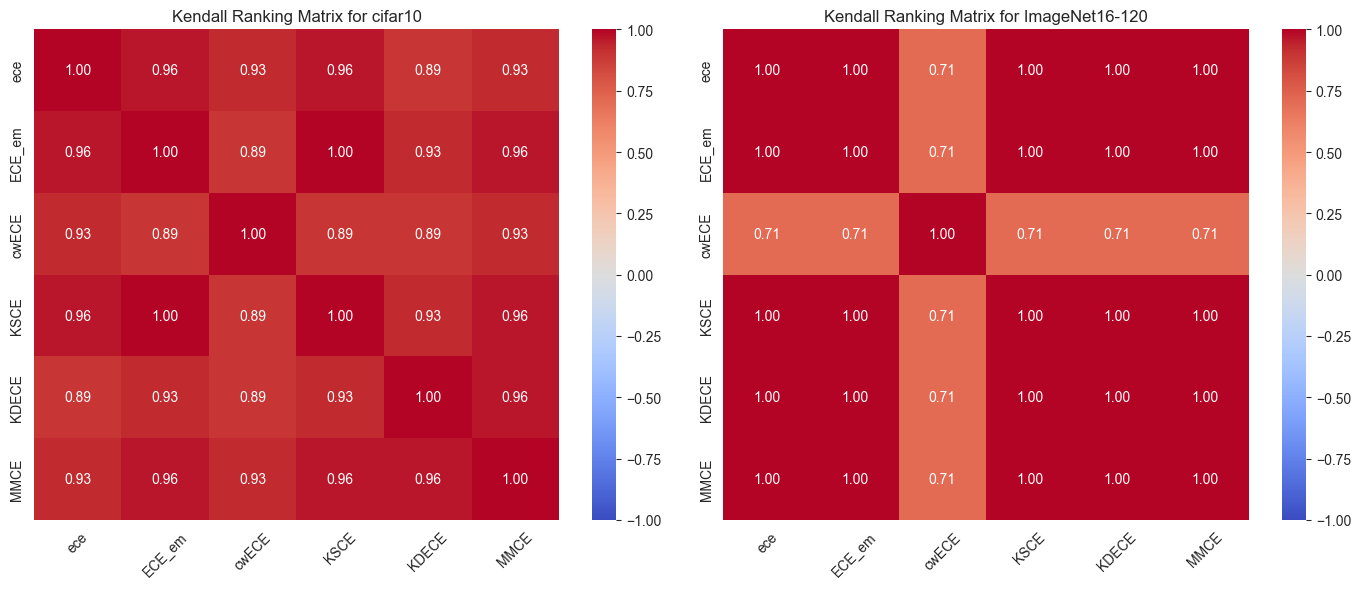

In [61]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt

def extract_metric_for_bin(metric_series, bin_size=15):
    def extract_value(x):
        entries = ast.literal_eval(x)
        for entry in entries:
            if 'n_bins' in entry and entry['n_bins'] == bin_size:
                return entry['result']
            elif 'num_bins' in entry and entry['num_bins'] == bin_size:
                return entry['result']

        if isinstance(entries, dict) and 'result' in entries:  # Check if single dictionary
            return entries['result']
        return None  # Return None if no matching bin_size is found

    return metric_series.apply(extract_value)

# Load the data with specified column names
column_names = [
    "config", "acc", "dataset", "ece", "sce", "ace", "MCE", "cwECE", "Marginal_CE_debias",
    "Marginal_CE", "ECE_em", "Ole", "KSCE", "KDECE", "MMCE", "NLL", "brier", "timestamp"
]
df = pd.read_csv('results_pre.csv', header=None, names=column_names)

# Metrics, datasets, and bin size
metrics = ['ece', 'ECE_em', 'cwECE', 'KSCE', 'KDECE', 'MMCE']
datasets = ['cifar10', 'ImageNet16-120']
bin_size = 15

kendall_matrices = {}
for dataset in datasets:
    df_dataset = df[df['dataset'] == dataset]

    metric_values = {}
    for metric in metrics:
        metric_values[metric] = extract_metric_for_bin(df_dataset[metric], bin_size=bin_size)

    metric_df = pd.DataFrame(metric_values)
    print(dataset)
    print(metric_df)
    kendall_matrices[dataset] = metric_df.corr(method='kendall', numeric_only=True)

# Visualize the matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, (dataset, matrix) in zip(axes, kendall_matrices.items()):
    sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax, fmt=".2f")
    ax.set_xticks(ticks=ax.get_xticks(), fontsize=10)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)
    ax.se
    ax.set_title(f'{dataset}', fontsize=10)

plt.tight_layout()

plt.savefig("combined_figure.png", dpi=300, bbox_inches='tight')
plt.show()
